In [25]:
%reload_ext autoreload
%autoreload 2

from some import *
add_project_root_to_path()

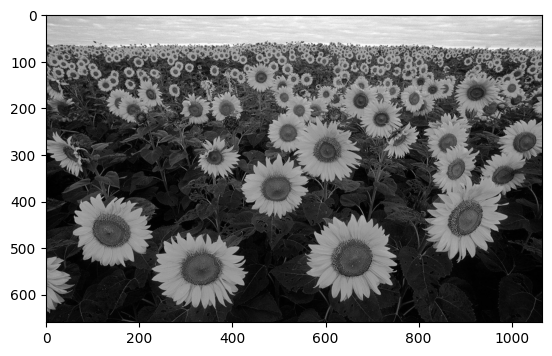

In [26]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy 
from utils.SIFT import * 

path ="../Data/sunflowers.jpg"
im = cv2.imread(path)
im = im.astype(float).mean(2)/255

plt.imshow(im,cmap="gray")
plt.show()

## Exercise 8.1
Create the function im_scales = scaleSpaced(im, sigma, n), where im_scales is a list containing the scale space pyramid of the original image im. The width and height of all images in
the pyramid im_scales are exactly the same as the original image im. I.e. here we do the naïve
implementation with increasing widths of Gaussians and no image downsampling, to make the
exercise easier. In other words im_scales is not a pyramid in image sizes; only in scale space.
This function should apply a Gaussian kernel with standard deviation sigma · 2
i
, where i =
0, 1, . . . , n − 1

### Exercise 8.2

Now, create the function DoG = differenceOfGaussians(im, sigma, n), where DoG is a list of
scale space DoGs of the original image im. Like the scaleSpaced function, the returned images
are all the same size as the original.

## Exercise 8.3

Finally, create the function blobs = detectBlobs(im, sigma, n, tau), where blobs are the
BLOBs (pixels) of the original image im with a DoG magnitude larger than a threshold tau. The
function should use non-maximum suppression to only give a single response for each BLOB. Reuse
or extend your code from week 6 to do the non-maximum suppression for the 8 neighbours in the
same scale. Instead of checking against all nine neighbours in the scale above and below, you can
apply a 3 × 3 max filter to all scales above and below, and only compare against the center pixel
in the max filtered image above and below.


MaxDoG[i] = cv2.dilate(abs(DoG[i]), np.ones((3,3)))
Try the detector on the image of sunflowers. Visualize your result by drawing a circle for each
BLOB, with the radius proportional to the scale of the BLOB. You can use cv2.circle for this.

In [27]:
import cv2

#blobs = set(blobs)
def visualize_blobs(blobs, im):
    for x, y, scale in blobs:

        radius = int(scale*np.sqrt(3))
        cv2.circle(im, (int(y), int(x)), radius, (10, 255, 255), 1)  

    cv2.imshow("Blob Detection", im)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()  


In [28]:
blobs = detectBlobs(im,2,7,0.1)


In [29]:
visualize_blobs(blobs, im)

In [30]:
from skimage import feature

im = cv2.imread(path)
im = im.astype(float).mean(2)/255
dogs = feature.blob_dog(im,min_sigma=2,max_sigma=128,sigma_ratio=2,threshold=0.1)
visualize_blobs(dogs, im)

In [31]:
visualize_blobs(dogs, im)


## Exercise 8.4

Create the function r_im = transformIm(im, theta, s), where r_im is a scaled and rotated
version of the original image im. In this case, theta is a rotation angle and s is a scale factor.
Use this function to produce a transformed version of the original image.

In [32]:
def transformIm(im, theta, s=1):
    # Convert theta from degrees to radians
    theta_rad = np.radians(theta)
    
    # Calculate the center of the image
    image_center = tuple(np.array(im.shape[1::-1]) / 2)
    
    # Calculate the rotation matrix
    rot_mat = cv2.getRotationMatrix2D(image_center, theta, s)
    
    # Perform the rotation
    result = cv2.warpAffine(im, rot_mat, im.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

im = cv2.imread(path)
im = im.astype(float).mean(2)/255

new_im = transformIm(im,45,2)

## Exercise 8.5

Use the SIFT detector to detect features in both the original and the transformed image. Plot the
features on top of the images. There are quite a few parameters to play with. Try changing them
and see the results.
Now match the features to each other. For this you can use cv2.BFMatcher().
Plot the matches; do they look qualitatively correct?
Filter your matches with the ratio test. Does this remove incorrect matches?

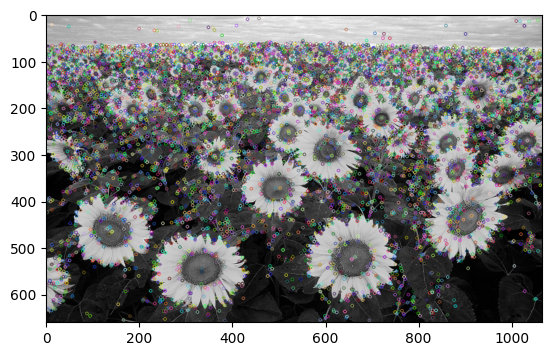

In [33]:
img1 = cv2.imread(path)
gray= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray,None)

img_ftrs = cv2.drawKeypoints(gray,kp1,img1)


plt.imshow(img1)

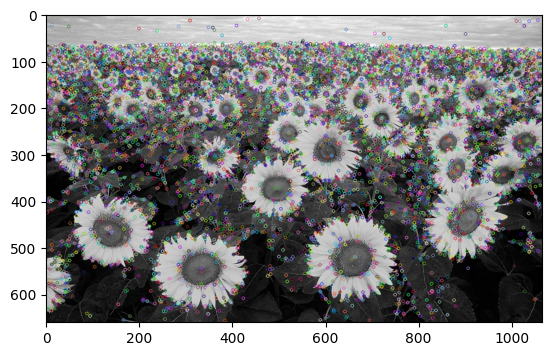

In [34]:

# Feature in transformed image 
img2 = cv2.imread(path)

tr_img = transformIm(img2,45,2)
gray_tr= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create()
kp2, des2 = sift.detectAndCompute(gray_tr,None)


img = cv2.drawKeypoints(gray_tr,kp2,img2)
plt.imshow(img)

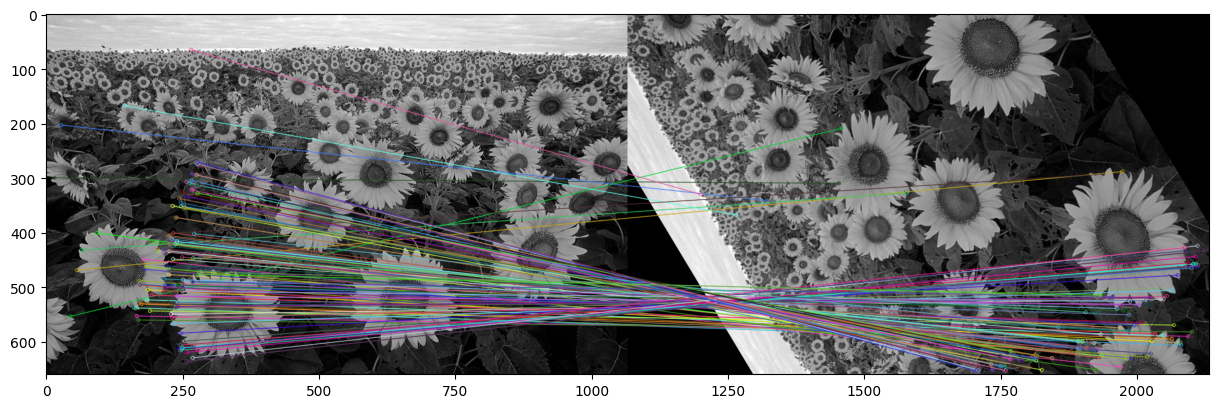

In [37]:
original_img = cv2.imread(path)[:,:,::-1]

img1_grey = cv2.cvtColor(original_img,cv2.COLOR_BGR2GRAY)

img2 = transformIm(original_img,theta=121,s=1.3)
img2_grey = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1_grey,None)
kp2, des2 = sift.detectAndCompute(img2_grey,None)



bf = cv2.BFMatcher() 
matches = bf.knnMatch(des1,des2,k=2)


good = [] 
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img1_grey,kp1,img2_grey,kp2,good[:125],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(img3)


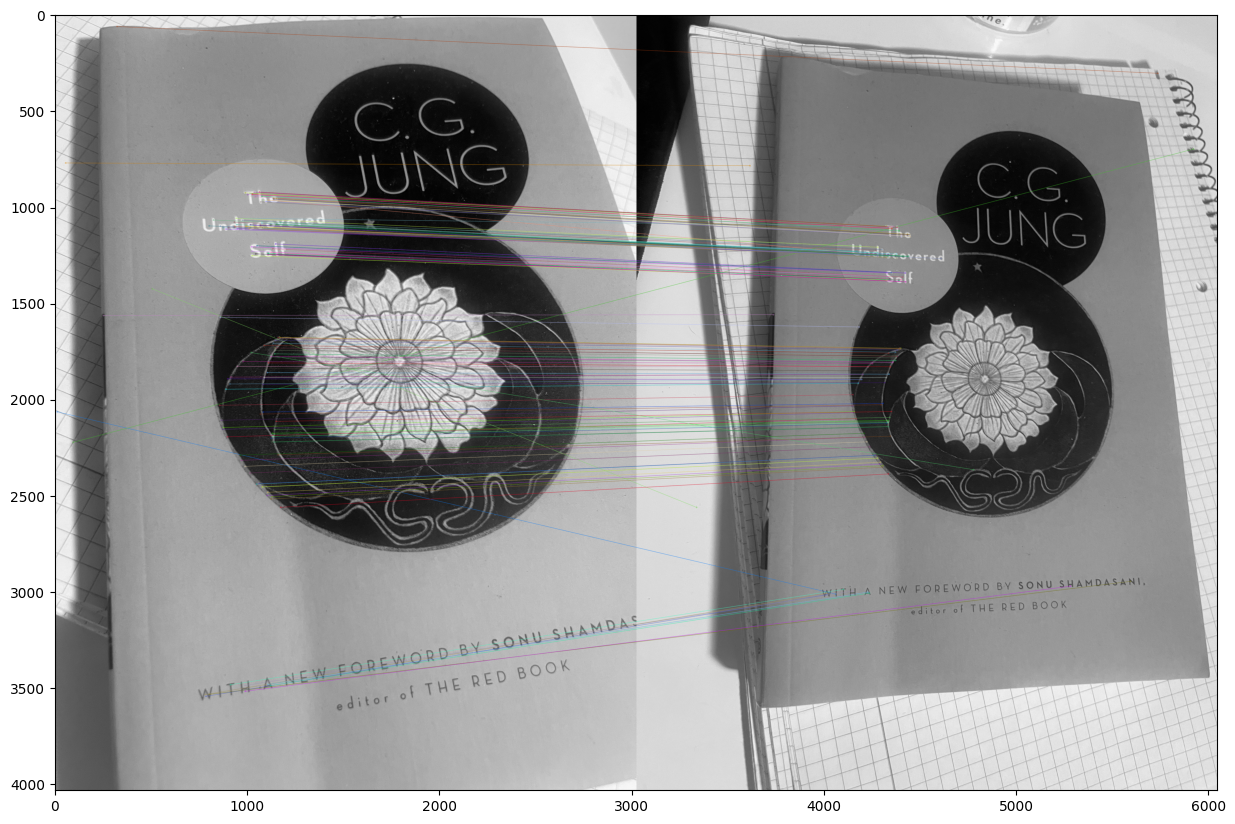

In [39]:

img1 = cv2.imread("../Data/Photo 24-03-2024, 15.43.34.jpg")[:,:,::-1]
img2 = cv2.imread("../Data/Photo 24-03-2024, 15.43.29.jpg")[:,:,::-1]

img1_grey = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
img2_grey = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)


sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1_grey,None)
kp2, des2 = sift.detectAndCompute(img2_grey,None)



bf = cv2.BFMatcher() 
matches = bf.knnMatch(des1,des2,k=2)


good = [] 
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img1_grey,kp1,img2_grey,kp2,good[:150],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(img3)